In [40]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#Generate a dataset with 2 classes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=10)

In [30]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [31]:
#generate a dummy model to compare with real model
dummy_model_prob=[0 for _ in range(len(y_test))]

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
#Prediction based on probabilities on positive class
model_prob=model.predict_proba(X_test)[:,1]

In [33]:
#Lets calculate the score
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)

- Why we do this:
- To compare your model against a trivial baseline.
- If your model’s AUC is only slightly better than the dummy, it means the model isn’t learning much.


In [34]:
#Calculate ROC Curve
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [35]:
_ #thresholds

array([inf,  0.])

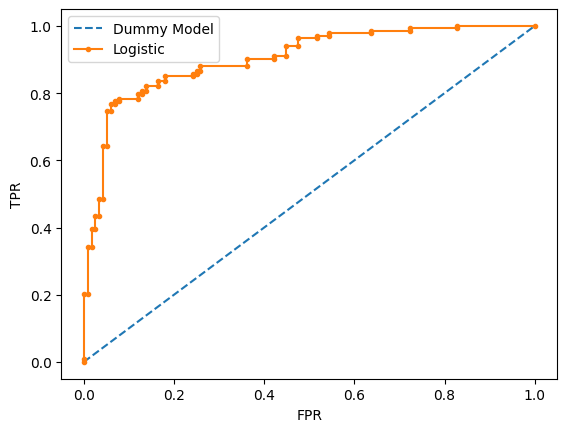

In [36]:
#plot the roc curve for the model
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

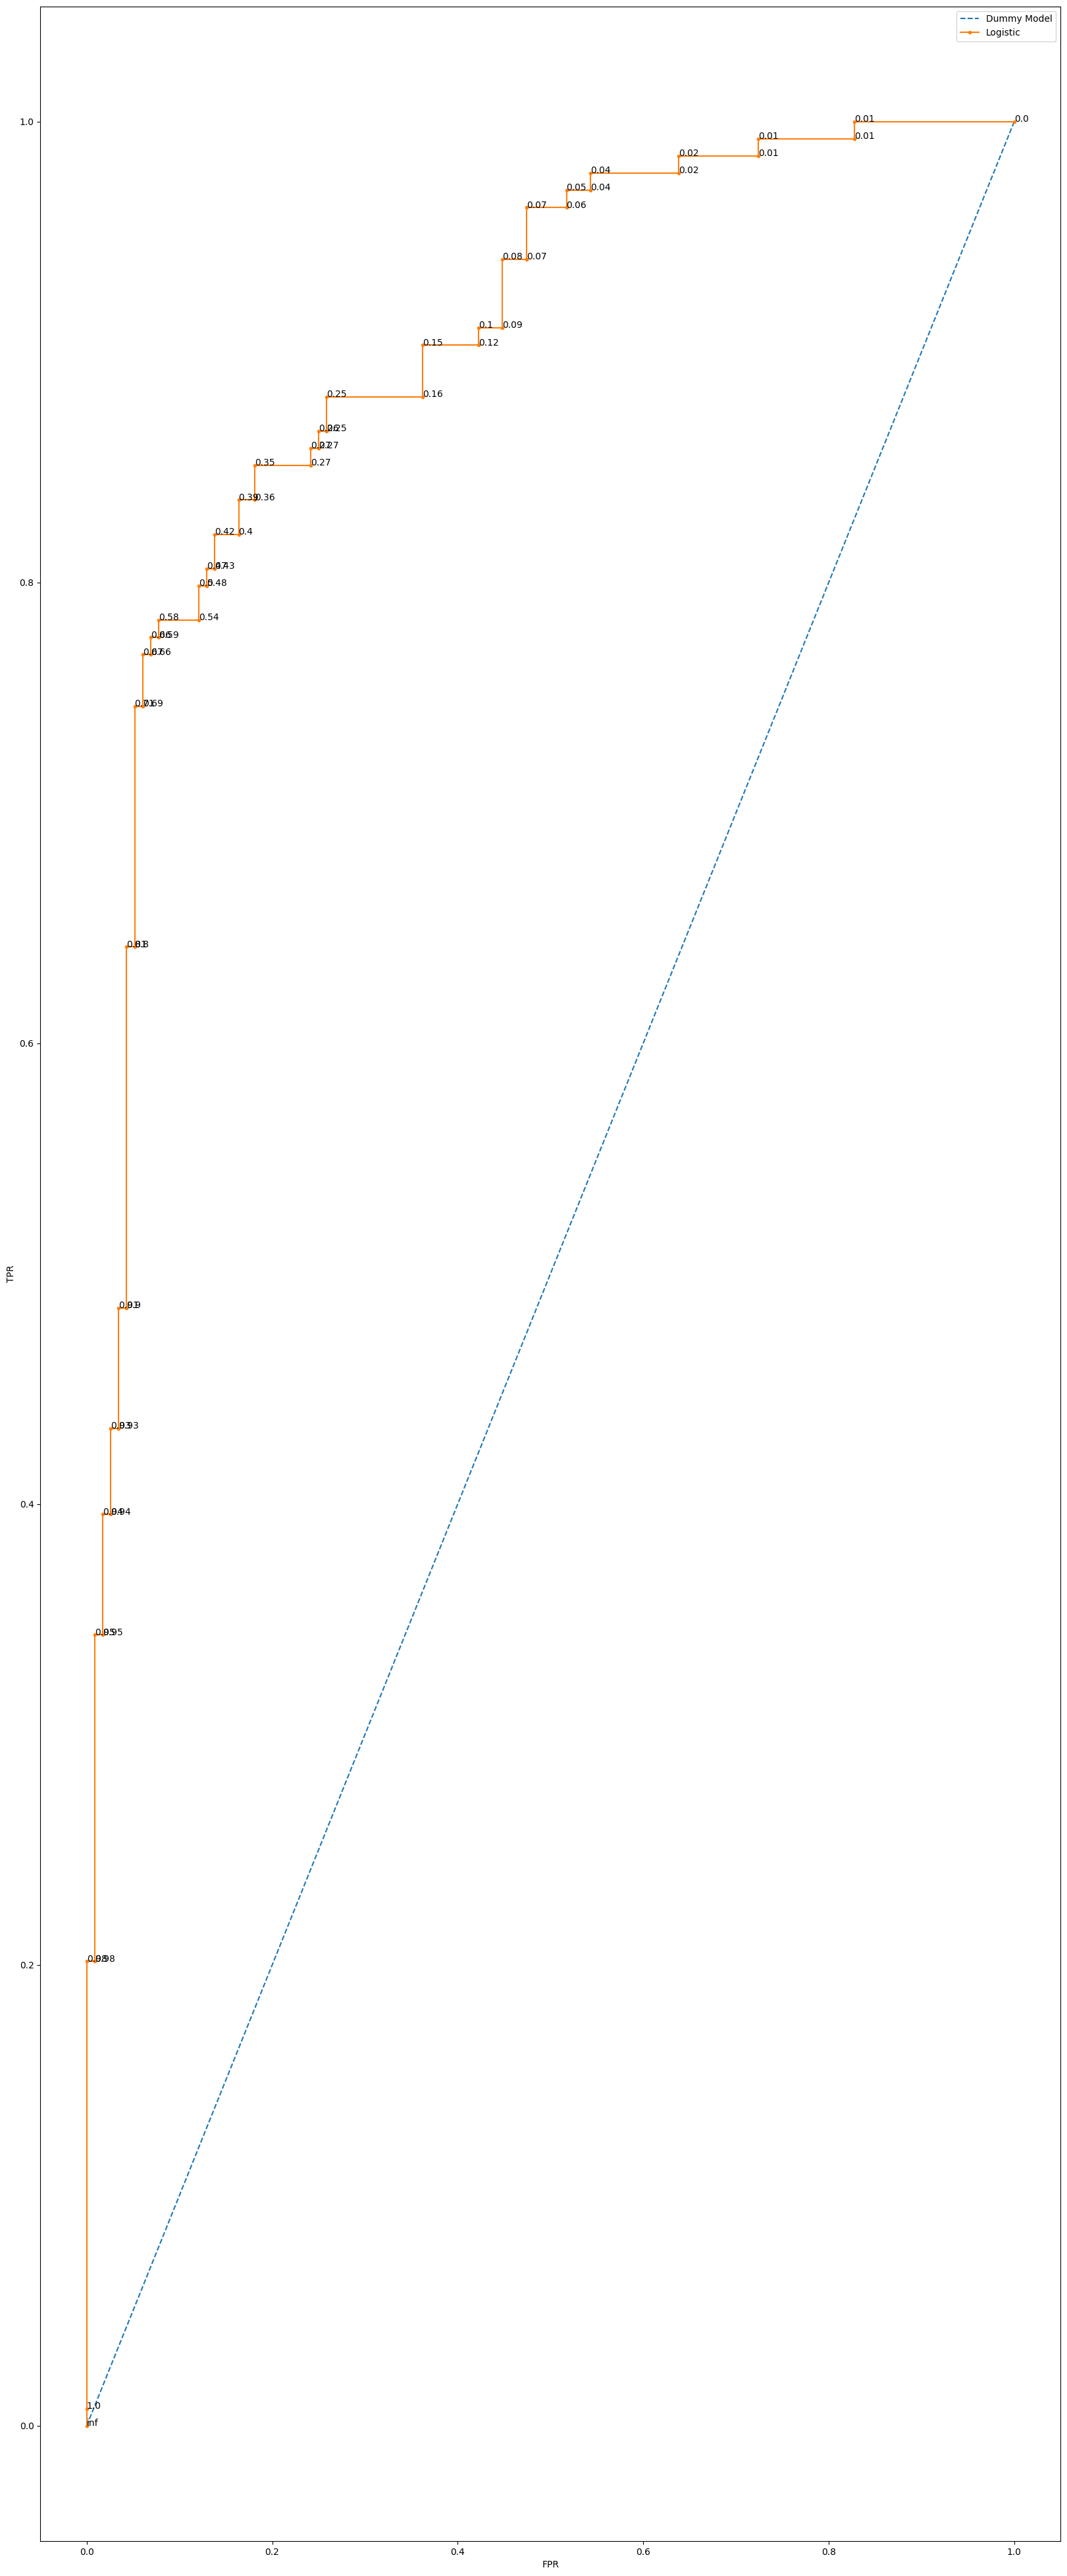

In [45]:
# plot the roc_curve for the model
fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1])) #xy is where is annotation happens!

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

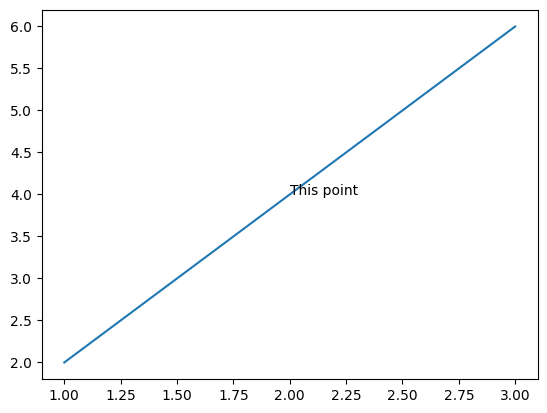

In [44]:
#what is an annotate()?

x = [1, 2, 3]
y = [2, 4, 6]

fig, ax = plt.subplots()
ax.plot(x, y)

# Add an annotation at point (2,4)
ax.annotate("This point", xy=(2, 4))

plt.show()